In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [2]:
Data=pd.read_csv("C:\\Users\\koné aicha koty\\Desktop\\titanic-passengers.csv",delimiter=";")

In [16]:
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S


In [4]:
Data.isnull().sum()#trouver les valeurs null dans  la dataframe

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
Data["Age"].isnull().sum()

177

In [6]:
Data["Age"].fillna(Data["Age"].mean(),inplace=True)

In [7]:
Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
Data.drop(["Cabin"],axis=1,inplace=True)

In [9]:
Data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
Data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
Data["Embarked"].fillna("s",inplace=True)

In [12]:
Data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

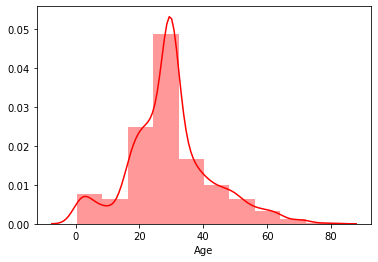

In [13]:
d=sns.distplot(Data["Age"],bins=10,hist=True,kde=True ,color="red")


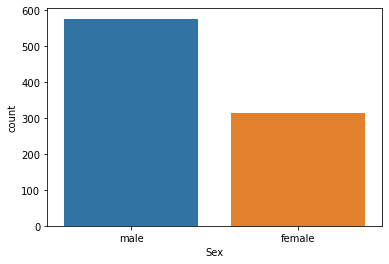

In [14]:
sns.countplot(x='Sex',data=Data)


AttributeError: module 'matplotlib' has no attribute 'hist'

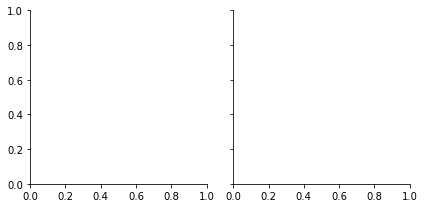

In [15]:
g=sns.FacetGrid(Data,col='Sex')
g.map(plt.hist,'Age',bins=20)

In [ ]:
sns.swarmplot(y=Data["Age"],x=Data["Sex"],hue=Data["Survived"])

In [ ]:
sns.scatterplot(x=Data["Embarked"],y=Data["Survived"])q

In [ ]:
import matplotlib.pyplot as plt
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax=ax,
        annot = True,
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(Data)

In [ ]:
l=Data["Name"].str.split(',',expand=True)
Data['Title']=l[0]
Data['Name']= l[1]

Data

In [ ]:
plt.figure(figsize=(25,16))
sns.barplot(x=Data['Title'],y=Data['Age'])

In [ ]:
l=Data["Name"].str.split('.',expand=True)
Data['Title']=l[0]
Data['Name']= l[1]

Data

In [ ]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                      "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master"
                   }


In [ ]:
Data['Title'].replace(Title_Dictionary,inplace=True)#df['Title'] = df['Title'].map(Title_Dictionary) meme fonctionnalité
Data

In [ ]:
plt.figure(figsize=(25,16))
sns.barplot(x=Data['Title'],y=Data['Age'])

In [ ]:
Data["Familysize"]= Data["Parch"]+Data["SibSp"]+1
Data

In [ ]:
f=sns.countplot(Data["Familysize"],color="red")

In [47]:
Data["survived"]=Data["Survived"].map({"Yes":1,"No":0})

In [54]:
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,female,C,Q,S,male,survived
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S,0,1,0,0,1,0,0
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S,0,1,0,0,1,0,0
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S,0,1,0,0,1,0,0
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S,1,0,0,0,1,1,0
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,1,0,1,0,0,1,1
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C,0,1,1,0,0,0,0
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,S,1,0,0,0,1,1,0
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S,0,1,0,0,1,0,0


In [27]:
Data['male']=pd.get_dummies(Data.Sex , prefix = 'Sex' ).iloc[:,0]

In [28]:
Data['female']=pd.get_dummies(Data.Sex , prefix = 'Sex' ).iloc[:,1]

In [29]:
Data['C']=pd.get_dummies(Data.Embarked , prefix = 'Embarked' ).iloc[:,0]

In [30]:
Data['Q']=pd.get_dummies(Data.Embarked , prefix = 'Embarked' ).iloc[:,1]

In [31]:
Data['S']=pd.get_dummies(Data.Embarked , prefix = 'Embarked' ).iloc[:,2]

In [33]:
Data['male']

0      0
1      0
2      0
3      1
4      0
      ..
886    1
887    0
888    1
889    0
890    1
Name: male, Length: 891, dtype: uint8

In [60]:
x=Data[['male','female','Age','SibSp','Parch','Fare','S','C','Q']]
y=Data['survived']

In [61]:
x

,male,female,Age,SibSp,Parch,Fare,S,C,Q
0,0,1,28.000000,0,0,13.0000,1,0,0
1,0,1,25.000000,0,0,7.6500,1,0,0
2,0,1,20.000000,0,0,7.8542,1,0,0
3,1,0,29.000000,0,4,21.0750,1,0,0
4,0,1,31.000000,1,0,52.0000,1,0,0
...,...,...,...,...,...,...,...,...,...
886,1,0,14.000000,1,0,30.0708,0,1,0
887,0,1,22.000000,0,0,7.2292,0,1,0
888,1,0,30.000000,0,0,8.6625,1,0,0
889,0,1,29.699118,0,0,7.8958,1,0,0


In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [64]:

model=LogisticRegression()#logreg.fit(x_train, y_train) 
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy={:.2f}".format(model.score(x_test, y_test)))

Accuracy=0.80


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


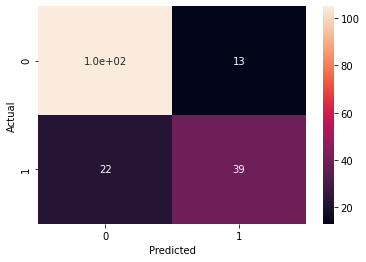

In [65]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [73]:
ord('Z')

90